<a href="https://colab.research.google.com/github/dajopr/lectures/blob/main/image_processing/lecture_06_frequency_domain_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Sheet: Frequency Domain Processing with OpenCV (with Solutions)

**General Instructions:**

* For each exercise, you will need to load an image. You can use standard images like 'lena.png', 'cameraman.tif', or any grayscale image of your choice. Make sure the image path is correct.
* Install necessary libraries: `pip install opencv-python numpy matplotlib`.
* Pay close attention to the data types required by OpenCV functions (e.g., `np.float32`).
* When displaying magnitude spectra, it's common practice to apply a logarithmic scale for better visualization: `magnitude_spectrum_log = np.log(magnitude_spectrum + 1)`. The `+1` is to avoid `log(0)`.
* Remember to shift the zero-frequency component to the center for visualization and filter application using `np.fft.fftshift()`.


In [ ]:
import os
import urllib

import cv2
import numpy as np
import matplotlib.pyplot as plt


def display_images(images, titles, rows=1, cols=None, figsize=(15, 5)):
    if cols is None:
        cols = len(images)
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

## Exercise 1: Computing and Visualizing the Fourier Spectrum

**Objective:** Understand how to compute the DFT of an image and visualize its magnitude and phase spectra.

**Tasks:**

1.  **Load an Image:** Load a grayscale image.
2.  **Prepare for DFT:** Convert to `np.float32`.
3.  **Compute DFT:** Use `cv2.dft()`.
4.  **Separate Real and Imaginary Parts.**
5.  **Compute Magnitude and Phase:** Use `cv2.magnitude()` and `cv2.phase()`.
6.  **Shift the Spectrum:** Use `np.fft.fftshift()`.
7.  **Visualize:** Original image, log-transformed centered magnitude spectrum, centered phase spectrum.

**OpenCV Functions to Focus On:**
* `cv2.imread(path, cv2.IMREAD_GRAYSCALE)`
* `image.astype(np.float32)`
* `cv2.dft(src, flags)`
* `cv2.magnitude(real_part, imaginary_part)`
* `cv2.phase(real_part, imaginary_part)`
* `np.fft.fftshift(spectrum)`
* `np.log(array + 1)`
* `matplotlib.pyplot` for display (or `cv2.imshow()`)

**Discussion Questions:**

* **1.1:** What information does the magnitude spectrum convey about the image? What about the phase spectrum?
* **1.2:** Why is `np.fft.fftshift()` important for visualization and for applying filters in the frequency domain? What does the spectrum look like before and after this shift?
* **1.3:** The DC component ($F(0,0)$ or the central pixel after shifting) in the magnitude spectrum is usually the brightest. What does this component represent in terms of the image's content?

---


In [ ]:
# 1. Load an Image (grayscale)
img = cv2.imread("images/cameraman.tif", cv2.IMREAD_GRAYSCALE)

# 2. Prepare for DFT: convert to float32
img_float32 = None

# 3. Compute DFT using cv2.dft()
dft = None

# 4. Separate real and imaginary parts
dft_real = None
dft_imag = None

# 5. Compute Magnitude and Phase
magnitude = None
phase = None

# 6. Shift the Spectrum to center
magnitude_shifted = None
phase_shifted = None

# 7. Visualize: original, log-magnitude spectrum, phase spectrum
magnitude_log = None
display_images(
    [img, magnitude_log, phase_shifted],
    [
        "Original Image",
        "Log Magnitude Spectrum (centered)",
        "Phase Spectrum (centered)",
    ],
)

## Exercise 2: Reconstructing an Image from its Fourier Spectrum

**Objective**: Understand the process of inverse DFT and the importance of both magnitude and phase.

**Tasks**:

1. **Compute DFT**: As in Exercise 1 (get the complex dft_output or dft_shift)
2. **Reconstruct with Full Spectrum**: Use cv2.idft()
3. **Reconstruct with Magnitude Only**: Create a new spectrum using original magnitude but zero (or constant) phase. Perform IDFT
4. **Reconstruct with Phase Only**: Create a new spectrum using original phase but random magnitude (between 0 and 255). Perform IDFT
5. **Visualize**: Original, fully reconstructed, mag-only reconstructed, phase-only reconstructed images

**OpenCV Functions to Focus On**:

- `cv2.dft(), cv2.idft(src, flags)`
- `np.fft.fftshift(), np.fft.ifftshift(shifted_spectrum)`
- `cv2.magnitude(), cv2.phase()`
- `cv2.polarToCart(magnitude, angle, x=None, y=None, angleInDegrees=None) (to create complex spectrum from mag/phase)`
- `NumPy array manipulation.`

**Discussion Questions**:
- **2.1:** What flags are typically used with cv2.idft()? Specifically, what is the purpose of cv2.DFT_REAL_OUTPUT and cv2.DFT_SCALE? Experiment with and without cv2.DFT_SCALE. What difference do you observe in the reconstructed image's intensity range?
- **2.2:** What does the image reconstructed only from the magnitude spectrum (and zero/constant phase) look like? What information seems to be lost or distorted?
- **2.3:** What does the image reconstructed only from the phase spectrum (and constant magnitude) look like? What information seems to be preserved? What does this tell you about the relative importance of magnitude and phase for image structure?

In [ ]:
# 2. Reconstruct with Full Spectrum (IDFT)
img_full_recon = None
img_full_recon_display = None

# 3. Reconstruct with Magnitude Only (zero phase)
mag_only_real, mag_only_imag = (None, None)
dft_mag_only = None
img_mag_only = None
img_mag_only_display = np.clip(img_mag_only, 0, 255).astype(np.uint8)

# 4. Reconstruct with Phase Only (unit magnitude)
random_mag = (np.random.rand(*magnitude.shape) * 255).astype(magnitude.dtype)
phase_only_real, phase_only_imag = (None, None)
dft_phase_only = None
img_phase_only = None
img_phase_only_display = None

# 5. Visualize
display_images(
    [img, img_full_recon_display, img_mag_only_display, img_phase_only_display],
    [
        "Original",
        "Reconstructed (Full Spectrum)",
        "Reconstructed (Magnitude Only)",
        "Reconstructed (Phase Only)",
    ],
    rows=1,
    cols=4,
    figsize=(18, 5),
)

## Exercise 3: Implementing and Applying a Low-Pass Filter (Smoothing)

**Objective**: Understand how to create and apply a low-pass filter in the frequency domain and observe its effect.

**Tasks**:
1. **Compute Centered DFT**: Load image, convert, DFT, shift (dft_shift)
2. **Create an Ideal Low-Pass Filter (ILPF) Mask**:

    - Determine image dimensions, center
    - Define a cutoff frequency D0
    - Create a 2-channel mask (for real and imaginary parts of dft_shift) with 1s inside radius D0 and 0s outside.
2. **Apply Filter**: Multiply dft_shift by the mask.
3. **Perform Inverse DFT**: Inverse shift, cv2.idft(), convert to uint8.
4. **Visualize**: Original, filter mask, filtered image.

OpenCV Functions to Focus On:

- `cv2.dft(), np.fft.fftshift(), np.fft.ifftshift()`
- `NumPy array creation and manipulation (for the mask, cv2.circle can be handy for ILPF)`
- `Element-wise array multiplication`
- `cv2.idft()`

**Discussion Questions:**
- **3.1:** What is the role of the cutoff frequency D0 in an Ideal Low-Pass Filter? How does changing D0 (e.g., making it smaller or larger) affect the filtered image? Try at least two different values for D0.
- **3.2:** Describe the visual effect of the ILPF on the image. Does it introduce any artifacts?
- **3.3** (Optional - Advanced): How would you implement a Gaussian Low-Pass Filter instead of an Ideal LPF? The formula for a Gaussian LPF is H(u,v)=e−D2(u,v)/(2σ2), where σ is the standard deviation (related to the cutoff D0​). What are the potential advantages of a Gaussian LPF over an Ideal LPF?

In [ ]:
# 1. Compute Centered DFT
img_lp = cv2.imread("images/cameraman.tif", cv2.IMREAD_GRAYSCALE)
img_lp_float32 = img_lp.astype(np.float32)
dft_lp = None
dft_shift_lp = None

# 2. Create Ideal Low-Pass Filter (ILPF) Mask
rows, cols = (None, None)
mask = None
D0 = None
Y, X = np.ogrid[:rows, :cols]

# 3. Apply Filter
dft_shift_lp_filtered = None

# 4. Perform Inverse DFT
f_ishift_lp = None
img_lp_filtered = None
img_lp_filtered_display = np.clip(img_lp_filtered, 0, 255).astype(np.uint8)

# 5. Visualize
display_images(
    [img_lp, mask[:, :, 0] * 255, img_lp_filtered_display],
    ["Original Image", f"ILPF Mask (D0={D0})", "Low-Pass Filtered Image"],
    rows=1,
    cols=3,
    figsize=(15, 5),
)

## Exercise 4: Implementing and Applying a High-Pass Filter (Sharpening/Edge Detection)

**Objective:** Understand how to create and apply a high-pass filter in the frequency domain.

**Tasks:**

1.  **Compute Centered DFT:** Load an image, convert to float, compute its DFT, and shift the zero-frequency component to the center (`dft_shift`).
2.  **Create an Ideal High-Pass Filter (IHPF) Mask:**
    * An IHPF can be created by inverting an ILPF mask: $H_{HPF}(u,v) = 1 - H_{LPF}(u,v)$.
    * Create an ILPF mask as in Exercise 3 with a chosen cutoff frequency `D0`.
    * Subtract this mask from 1 to get the IHPF mask (values will be 0 inside the radius `D0` and 1 outside).
3.  **Apply the Filter:**
    * Multiply `dft_shift` by the IHPF mask.
4.  **Perform Inverse DFT:**
    * Shift back, compute IDFT, take magnitude, convert to `np.uint8`. (Careful handling for visualization may be needed).
5.  **Visualize:**
    * Display the original image.
    * Display the IHPF mask.
    * Display the filtered image.

**OpenCV Functions to Focus On:**
* `cv2.dft()`, `np.fft.fftshift()`, `np.fft.ifftshift()`
* NumPy array creation and manipulation (for the mask)
* Element-wise array multiplication
* `cv2.idft()`
* `cv2.normalize(src, dst, alpha, beta, norm_type)` (potentially useful for visualizing HPF output)

**Discussion Questions:**

* **4.1:** Similar to the LPF, how does the choice of `D0` for the underlying ILPF (which defines the IHPF) affect the result of high-pass filtering? Experiment with different `D0` values.
* **4.2:** Describe the visual effect of the IHPF on the image. What features are enhanced or suppressed? Does it also suffer from ringing artifacts?
* **4.3:** The output of a high-pass filter often has a wide dynamic range and can have negative values before being converted to `np.uint8`. How does the conversion to `np.uint8` (which clips values outside 0-255) affect the visualization of the high-pass filtered result? Could `cv2.normalize()` be useful here before conversion?

In [ ]:
# 1. Compute Centered DFT
img_hp = cv2.imread("images/cameraman.tif", cv2.IMREAD_GRAYSCALE)
img_hp_float32 = img_hp.astype(np.float32)
dft_hp = None
dft_shift_hp = None

# 2. Create Ideal High-Pass Filter (IHPF) Mask
ihpf_mask = np.ones((rows, cols, 2), np.float32)


# 3. Apply the Filter
dft_shift_hp_filtered = None

# 4. Perform Inverse DFT
f_ishift_hp = None
img_hp_filtered = None
# Normalize for better visualization
img_hp_filtered_norm = None
img_hp_filtered_display = img_hp_filtered_norm.astype(np.uint8)

# 5. Visualize
display_images(
    [img_hp, ihpf_mask[:, :, 0] * 255, img_hp_filtered_display],
    ["Original Image", f"IHPF Mask (D0={D0})", "High-Pass Filtered Image"],
    rows=1,
    cols=3,
    figsize=(15, 5),
)

## Exercise 5: Image Compression using FFT

**Note**: Image compression is usually done using other transform techniques (such as wavelets) but for educational purposes we use the fourier transform.

**Objective**: Understand how the Fourier Transform can be used for lossy image compression by discarding less significant frequency coefficients.


**Background**:
The Discrete Fourier Transform (DFT), often computed via the Fast Fourier Transform (FFT), decomposes an image into its frequency components. The magnitude of these components indicates their importance or "energy." Many images have a lot of their energy concentrated in the lower frequency components (representing smoother areas and overall structure), while higher frequency components (representing fine details and noise) might have smaller magnitudes.

Lossy compression can be achieved by:
1. Transforming the image to the frequency domain (FFT).
2. Keeping a certain number of the most significant (highest magnitude) coefficients and discarding the rest (setting them to zero).
3. Transforming the modified spectrum back to the spatial domain (Inverse FFT).

The more coefficients are discarded, the higher the compression ratio, but also the greater the loss of image quality.

**Tasks:**

1.  **Load an Image:** Load a grayscale image.
2.  **Compute DFT:**
    * Convert the image to `np.float32`.
    * Perform a 2D DFT (e.g., using `np.fft.fft2` or `cv2.dft`).
    * Shift the zero-frequency component to the center (`np.fft.fftshift`). Let this be `dft_shift`.
3.  **Determine Coefficients to Keep:**
    * Calculate the magnitude of the complex coefficients in `dft_shift`.
    * **Strategy 1 (Thresholding):** Define a threshold. Set all coefficients whose magnitude is below this threshold to zero (both real and imaginary parts, or the complex number itself).
    * **Strategy 2 (Keep Top N%):** Determine a percentage of coefficients to keep (e.g., keep the top 10%, 5%, or 1% of coefficients with the largest magnitudes). Set all other coefficients to zero. This is often more robust.
        * To implement this, you can flatten the magnitude array, find the threshold value corresponding to the Nth percentile, and then apply this threshold.
4.  **Create the Compressed Spectrum:**
    * Apply the chosen strategy to `dft_shift` to create a new spectrum where less significant coefficients are zeroed out. Let this be `dft_compressed_shift`.
5.  **Perform Inverse DFT:**
    * Inverse shift `dft_compressed_shift` back (`np.fft.ifftshift`).
    * Compute the inverse DFT (e.g., `np.fft.ifft2` or `cv2.idft`).
    * Take the absolute value (or real part if using `np.fft.ifft2` on a spectrum that should produce a real image) of the result.
    * Clip values to the 0-255 range and convert to `np.uint8` for display. This is your compressed image.
6.  **Visualize and Compare:**
    * Display the original image.
    * Display the log-magnitude spectrum of the original image.
    * Display the log-magnitude spectrum *after* zeroing out coefficients (to see which ones were removed).
    * Display the compressed image.
    * Experiment with different thresholds or percentages of coefficients kept.
7.  **(Optional) Calculate Compression Ratio (Conceptual):**
    * The "compression ratio" here isn't a true file size compression but rather relates to the proportion of DFT coefficients set to zero. If you keep P% of coefficients, you've effectively discarded (100-P)%. A more advanced step would be to encode the non-zero coefficients efficiently (e.g., run-length encoding), but that's beyond this basic exercise.

**OpenCV/NumPy Functions to Focus On:**
* `cv2.imread()`, `astype(np.float32)`
* `np.fft.fft2()`, `np.fft.fftshift()`
* `np.abs()` (for magnitude of complex numbers)
* NumPy array manipulation for thresholding/masking.
* `np.sort()`, `np.percentile()` (useful for Strategy 2)
* `np.fft.ifftshift()`, `np.fft.ifft2()`
* `np.clip()`, `astype(np.uint8)`
* `matplotlib.pyplot` for display.

---
**Discussion Questions:**

1.  **Effect of Threshold/Percentage:** How does changing the threshold (Strategy 1) or the percentage of coefficients kept (Strategy 2) affect:
    * The visual quality of the compressed image?
    * The appearance of the magnitude spectrum after zeroing out coefficients?
2.  **Information Loss:** What kind of image information seems to be lost first when you increase the compression (i.e., discard more coefficients)? Why do you think this is the case based on what high and low frequencies represent?
3.  **Artifacts:** Do you observe any specific artifacts in the compressed images? (e.g., blockiness, ringing, excessive blurring).
4.  **Choice of Coefficients:** Why is it generally better to keep coefficients with the largest magnitudes rather than, say, randomly selected coefficients or coefficients only from a specific region of the spectrum (like only low frequencies, which would be similar to just low-pass filtering)?
5.  **Limitations:** What are the limitations of this simple FFT-based compression method compared to more advanced techniques like JPEG or JPEG 2000 (which also use frequency transforms but with more sophistication)?

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib


img = cv2.imread("images/cameraman.tif", cv2.IMREAD_GRAYSCALE)

img_float32 = np.float32(img)

# --- 2. Compute DFT ---
dft = None
dft_shift = None

# Original magnitude spectrum for display
magnitude_spectrum_original = None

# --- Parameters for Compression ---
# Experiment with these values
# percentage_to_keep = 10 # Keep top 10% of coefficients by magnitude
percentages_to_keep = [20, 10, 5, 1]  # Example: 20%, 10%, 5%, 1%

results_to_display = [img, magnitude_spectrum_original]
result_titles = ["Original Image", "Original Log Magnitude Spectrum"]


# --- Display all results ---
num_experiments = len(percentages_to_keep)
display_images(
    results_to_display,
    result_titles,
    rows=num_experiments + 1,  # 1 row for original, 1 per experiment
    cols=2,  # Spectrum and Image
    figsize=(10, 5 * (num_experiments + 1)),
)

## Exercise 6: Simulating Motion Blur and Restoration with Inverse Filtering

**Objective**
Understand how linear motion blur can be modeled in the frequency domain and how inverse filtering can be applied for restoration, observing its limitations.

**Background**
Motion blur often occurs when there's relative motion between the camera and the subject during exposure. For simple linear motion, this can be modeled by convolving the image with a blur kernel. In the frequency domain, this convolution becomes a multiplication. Inverse filtering attempts to reverse this by dividing the DFT of the blurred image by the DFT of the blur kernel.

**Tasks**

1. **Load Image and Prepare**:
   - Load a grayscale image.
   - Convert it to np.float32.
   - Determine optimal DFT sizes and pad the image accordingly.

2. **Create a Motion Blur Kernel (Point Spread Function - PSF)**:
   - Create a small 2D NumPy array for the kernel (e.g., 15x15 pixels).
   - Simulate horizontal motion blur by creating a horizontal line of non-zero values in the center row of the kernel. For instance, set a few pixels in the middle row to 1/N where N is the length of the line (to keep energy normalized).
   - Example: For a 5-pixel horizontal blur in a 15x15 kernel, `psf[7, 5:10] = 0.2`.
   - Pad this PSF to the same dimensions as the padded image, ensuring the "center" of the blur aligns correctly (this might involve careful shifting before padding or after DFT).

3. **Attempt Restoration using Inverse Filtering**:
   - Take the DFT of the blurred image (obtained in step 3).
   - Take the DFT of the motion blur kernel (PSF, obtained in step 2).
   - Perform inverse filtering: Divide the DFT of the blurred image by the DFT of the kernel.
   - Caution: Division by zero or very small numbers in the kernel's DFT can cause extreme noise amplification. Add a very small constant (e.g., 1e-6) to the denominator of the kernel's DFT before division to stabilize it: `Restored_DFT = Blurred_DFT / (Kernel_DFT + epsilon)`.
   - Compute the inverse DFT of the restored spectrum. Normalize and convert to np.uint8.

4. **Visualize Results**:
   - Display the original image.
   - Display the motion blur kernel (PSF) (you might need to scale it for visibility).
   - Display the simulated blurred image.
   - Display the restored image using inverse filtering.

**OpenCV/NumPy Functions to Focus On**

- `cv2.dft()`, `np.fft.fftshift()`, `np.fft.ifftshift()` (though shifting might be less critical if kernel is centered correctly before DFT)
- NumPy array creation and manipulation for kernel and padding.
- Element-wise array multiplication and division.
- `cv2.idft()`
- `cv2.normalize()`

**Discussion Questions**

1. How does the length and orientation of the line in your motion blur kernel affect the appearance of the blurred image?
2. What happens to the restored image when using inverse filtering, especially in areas where the kernel's DFT has very small magnitudes (near zeros)? Describe the artifacts you observe.
3. Experiment with the epsilon value added during the inverse filtering division. How does a smaller or larger epsilon affect the restored image and noise amplification?
4. Add a small amount of Gaussian noise to the blurred image before attempting inverse filtering. How does this noise impact the restoration quality? Why is inverse filtering particularly sensitive to noise?

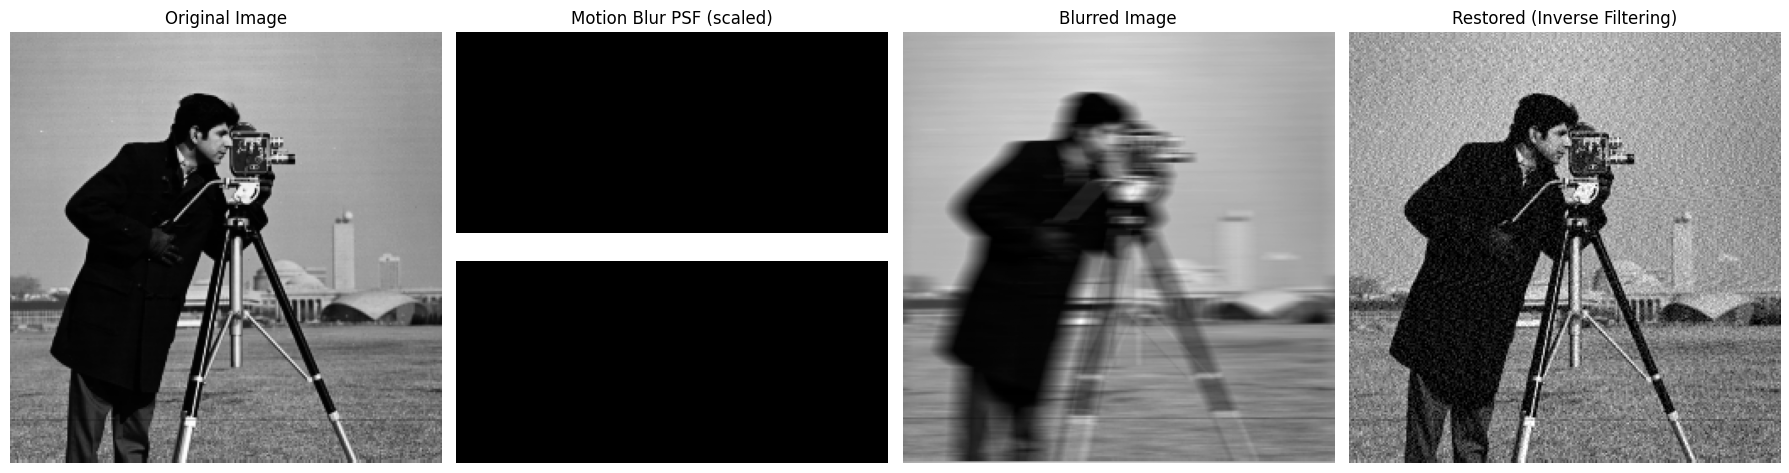

In [ ]:
# Step 1: Load image and pad for optimal DFT size
img_blur = cv2.imread("images/cameraman_blurred.tif", cv2.IMREAD_GRAYSCALE).astype(
    np.float32
)

img_orig_f32 = img_blur.astype(np.float32)
rows, cols = img_blur.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
img_padded = np.zeros((nrows, ncols), np.float32)
img_padded[:rows, :cols] = img_orig_f32

# Step 2: Create motion blur PSF (horizontal, length=15)
psf_size = 15
psf = np.zeros((psf_size, psf_size), np.float32)
psf[psf_size // 2, :] = 1.0 / psf_size
psf_padded = np.zeros_like(img_padded)
# Place PSF at top-left, then shift to center
psf_padded[:psf_size, :psf_size] = psf
psf_padded = np.roll(psf_padded, -psf_size // 2, axis=0)
psf_padded = np.roll(psf_padded, -psf_size // 2, axis=1)

# Step 3: Simulate motion blur
# Optional
# Step 4: Inverse filtering restoration
epsilon = 1e-6
dft_blur2 = cv2.dft(img_blur, flags=cv2.DFT_COMPLEX_OUTPUT)
psf_mag = None
denom = psf_mag + epsilon
restored_real = None
restored_imag = None
restored_dft = cv2.merge([restored_real, restored_imag])
img_restored = cv2.idft(restored_dft, flags=cv2.DFT_REAL_OUTPUT | cv2.DFT_SCALE)
img_restored = np.clip(img_restored, 0, 255)
img_restored_crop = img_restored[:rows, :cols].astype(np.uint8)

# Step 5: Visualize
display_images(
    [img, psf * (255.0 / psf.max()), img_blur, img_restored_crop],
    [
        "Original Image",
        "Motion Blur PSF (scaled)",
        "Blurred Image",
        "Restored (Inverse Filtering)",
    ],
    rows=1,
    cols=4,
    figsize=(18, 5),
)

## Exercise 7: Atmospheric Turbulence Restoration with Wiener Filtering

***Objective***
Understand the model for atmospheric turbulence degradation and apply Wiener filtering for restoration of turbulence-affected images.

**Background**
Atmospheric turbulence degrades images captured over long distances by causing random variations in the refractive index of air. A frequency domain model for this degradation can be expressed as H(u,v)=e^(-k(u^2+v^2)^(5/6)), where k is a constant related to the turbulence strength. Wiener filtering provides an optimal (in a mean square error sense) linear filter for restoration when both the degradation function and noise statistics are known or can be estimated.

**Tasks**

1. **Load and Prepare Turbulence-Affected Image**:
   - Load a grayscale image already affected by atmospheric turbulence.
   - Convert it to np.float32.
   - Determine optimal DFT sizes and pad the image accordingly.

2. **Estimate the Atmospheric Turbulence Function H(u,v)**:
   - Get the dimensions (rows, cols) of the padded image.
   - Create u and v coordinate grids (centered at the spectrum's origin after an fftshift). You can use np.meshgrid and then shift them.
   - Calculate D^2 = u^2 + v^2.
   - Choose a value for k (e.g., 0.0025, 0.001, 0.00025) that best models the observed turbulence.
   - Compute H(u,v) = e^(-k(D^2)^(5/6)). This H should be a 2D array of the same size as the DFT.

3. **Apply Wiener Filtering**:
   - The Wiener filter in the frequency domain is given by:
     
     W(u,v) = H*(u,v) / (|H(u,v)|² + K)
     
     where H*(u,v) is the complex conjugate of the degradation function, |H(u,v)|² is its squared magnitude, and K is an estimate of the noise-to-signal power ratio (NSR). Since our H(u,v) is real, H*(u,v) = H(u,v).

   - Compute the DFT of the turbulence-affected image (and shift it).
   - Estimate K. This is often the trickiest part. For this exercise, you can experiment with different constant values for K (e.g., 0.1, 0.01, 0.001).
   - Calculate the Wiener filter W(u,v).
   - Multiply the DFT of the turbulence-affected image by W(u,v).
   - Compute the inverse DFT of the result. Normalize and convert to np.uint8.

4. **Visualize Results**:
   - Display the turbulence-affected input image.
   - Display the restored image using Wiener filtering.
   - Optionally, display different restoration results with varying k and K parameters.

**OpenCV/NumPy Functions to Focus On**

- `cv2.dft()`, `np.fft.fftshift()`, `np.fft.ifftshift()`
- `np.meshgrid()` for creating frequency coordinates.
- NumPy array math for H(u,v) and Wiener filter calculation.
- `cv2.idft()`, `cv2.normalize()`

**Discussion Questions**

1. How does changing the turbulence constant k affect the restoration results?
2. Experiment with different values for the constant K (NSR estimate) in the Wiener filter. How does K influence the restoration? What happens if K is too small or too large?
3. Compare the Wiener filter's performance to what you might expect from inverse filtering on turbulence-degraded images. Why is Wiener filtering generally more robust?
4. What are the challenges in estimating the actual turbulence model from a real-world degraded image?
5. How might adaptive approaches to parameter selection (varying k or K locally) potentially improve restoration results for images with spatially varying turbulence effects?

In [ ]:
# Load turbulence-affected image
img_turb = cv2.imread("images/aerial_view_turb_2.tif", cv2.IMREAD_GRAYSCALE)
img_turb_f32 = img_turb.astype(np.float32)

rows, cols = img_turb.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
img_turb_padded = np.zeros((nrows, ncols), np.float32)
img_turb_padded[:rows, :cols] = img_turb_f32

# Reference for display
img_no_turb = cv2.imread("images/aerial_view_no_turb.tif", cv2.IMREAD_GRAYSCALE)
# Estimate atmospheric turbulence function H(u,v)

H = None

# Wiener filtering
K = 0.01  # Try 0.1, 0.01, 0.001 for different noise-to-signal ratios
dft_turb = cv2.dft(img_turb_padded, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_turb_shift = np.fft.fftshift(dft_turb, axes=(0, 1))

# Wiener filter (H is real, so conj(H) = H)

H_wiener_2ch = None

# Apply Wiener filter in frequency domain
dft_restored = None

# Inverse DFT to spatial domain
dft_restored_ishift = np.fft.ifftshift(dft_restored, axes=(0, 1))
img_restored = cv2.idft(dft_restored_ishift, flags=cv2.DFT_REAL_OUTPUT | cv2.DFT_SCALE)
img_restored = img_restored[:rows, :cols]
img_restored_disp = cv2.normalize(img_restored, None, 0, 255, cv2.NORM_MINMAX).astype(
    np.uint8
)

# Visualize
display_images(
    [img_turb, img_restored_disp, img_no_turb],
    [
        "Turbulence-Affected Image",
        "Restored (Wiener Filter)",
        "Original without turbulence",
    ],
    rows=1,
    cols=3,
    figsize=(12, 5),
)